<a href="https://colab.research.google.com/github/erick-huang15/Python_Exercises/blob/main/KMeans_Find_K_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRjpJFmmCtRL0XuvisnaZodmHtWfv2UX_AUxZSKVH-iwxi89YSsGXa6Me71JfFIMn1SBKKq8opMPXik/pub?output=xlsx'
data = pd.read_excel(url)
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.0,1.0,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3
1,1.0,2.0,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8
2,2.0,3.0,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9
3,3.0,4.0,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3
4,4.0,5.0,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    float64
 1   Customer Id      850 non-null    float64
 2   Age              850 non-null    float64
 3   Edu              850 non-null    float64
 4   Years Employed   850 non-null    float64
 5   Income           850 non-null    float64
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(10)
memory usage: 66.5 KB


In [11]:
data.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [27]:
x=data[['Age','Income']] # this is to define x

In [28]:
scaler=StandardScaler()
scaled_x = scaler.fit_transform(x)

Text(0, 0.5, 'inertia')

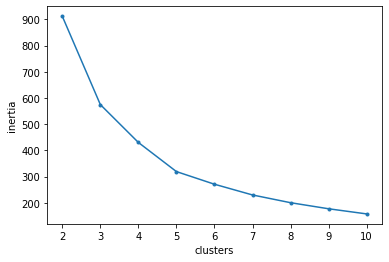

In [30]:
inertias = [] # this is to find the elbow score plotting inertias

for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_x)
  inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

The elbow score is 3

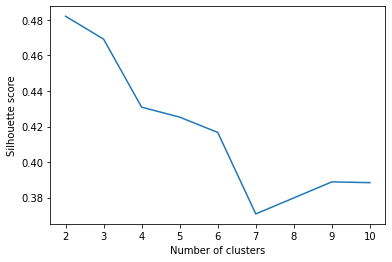

In [34]:
sil =[]

for k in range(2,11):
  model =KMeans(n_clusters=k)
  model.fit(scaled_x)
  sil.append(silhouette_score(scaled_x,model.labels_))

 # plot no of cluster and inertia

plt.plot(range(2,11),sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show() 

The best score is 2 

In [35]:
# this is to instantiate the k value 
km = KMeans(n_clusters=5, random_state=42)

In [37]:
# this is to add a column to the dataframe to add the cluster label to fit and predict x
data['cluster'] = km.fit_predict(scaled_x)

In [38]:
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0.0,1.0,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3,0
1,1.0,2.0,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8,2
2,2.0,3.0,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9,0
3,3.0,4.0,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3,1
4,4.0,5.0,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2,3


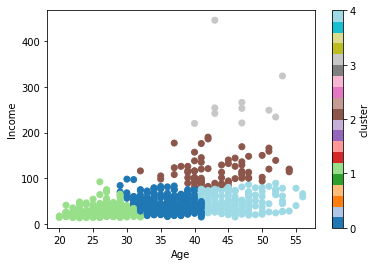

In [41]:
plt.scatter(x=data['Age'],y=data['Income'],c=data['cluster'],cmap='tab20')
plt.xlabel('Age')
plt.ylabel('Income')
cb = plt.colorbar(ticks=[0,1,2,3,4])
cb.set_label('cluster')      